<a href="https://colab.research.google.com/github/gayatri-bagusetty-34/Deep-Learning/blob/main/Transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Loading**

In [ ]:
import keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.layers import Input, Dense, Flatten
from keras.models import Model, Sequential
from keras.applications.resnet50 import ResNet50, preprocess_input
from keras.preprocessing.image import load_img
from glob import glob

# Download MNIST dataset
!wget https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data(path='mnist.npz')

# Expand grayscale channel (1 → 3) to match ResNet50 input
X_train = x_train.reshape((60000, 28, 28, 1)).repeat(3, axis=-1)
X_test = x_test.reshape((10000, 28, 28, 1)).repeat(3, axis=-1)

# Resize images to (32,32,3) to match ResNet50 input (224 x 224 for ResNet and 227 x 227 for VGG16)
X_train = tf.image.resize(X_train, (32, 32))
X_test = tf.image.resize(X_test, (32, 32))

# Convert to TensorFlow tensors
X_train = tf.convert_to_tensor(X_train, dtype=tf.float32)
X_test = tf.convert_to_tensor(X_test, dtype=tf.float32)

# Normalize pixel values to [0,1]
X_train /= 255.0
X_test /= 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Check shapes
print(f"Train images shape: {X_train.shape}, Test images shape: {X_test.shape}")
print(f"Train labels shape: {y_train.shape}, Test labels shape: {y_test.shape}")

--2025-02-05 09:17:49--  https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.212.207, 173.194.215.207, 108.177.12.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.212.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11490434 (11M) [application/octet-stream]
Saving to: ‘mnist.npz’

mnist.npz           100%[===================>]  10.96M  67.3MB/s    in 0.2s    

2025-02-05 09:17:49 (67.3 MB/s) - ‘mnist.npz’ saved [11490434/11490434]

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train images shape: (60000, 32, 32, 3), Test images shape: (10000, 32, 32, 3)
Train labels shape: (60000, 10), Test labels shape: (10000, 10)


**ResNet**

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 29s 20ms/step - accuracy: 0.7041 - loss: 0.9772 - val_accuracy: 0.8885 - val_loss: 0.3490
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.8872 - loss: 0.3624 - val_accuracy: 0.9121 - val_loss: 0.2797
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.9058 - loss: 0.2944 - val_accuracy: 0.9131 - val_loss: 0.2663
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9135 - loss: 0.2688 - val_accuracy: 0.9337 - val_loss: 0.2121
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9242 - loss: 0.2413 - val_accuracy: 0.9359 - val_loss: 0.2053
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9264 - loss: 0.2336
Test Accuracy: 93.59%
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Sample after training


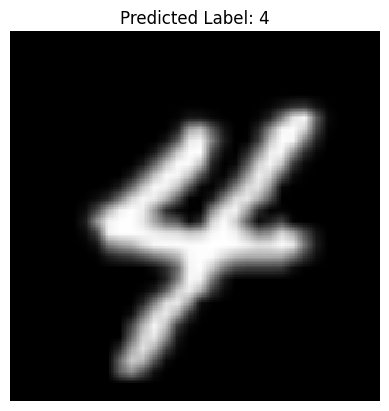

In [ ]:
# Define ResNet model
resnet_base = ResNet50(include_top=False, weights='imagenet', input_shape=(32,32,3))

# Freeze base layers (optional, useful for fine-tuning)
for layer in resnet_base.layers:
    layer.trainable = False

# Build full model
model = Sequential([
    resnet_base,
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # 10 classes for MNIST digits
])

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=64)

# Evaluate model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

# Select a test sample
test_img = X_train[131]

# Predict the class for the sample image
y_pred = model.predict(np.expand_dims(test_img, axis=0))  # Add batch dimension
predicted_class = np.argmax(y_pred)

print("Sample after training")

# Convert color image to grayscale
test_img_gray = tf.image.rgb_to_grayscale(test_img)

# Visualize the grayscale image AFTER training with predicted label
plt.imshow(tf.image.resize(test_img_gray, (227, 227)).numpy().squeeze(), cmap='gray', interpolation='none')
plt.title(f"Predicted Label: {predicted_class}")
plt.axis('off')
plt.show()

 **AlexNet**

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 38s 35ms/step - accuracy: 0.8360 - loss: 0.4721 - val_accuracy: 0.9846 - val_loss: 0.0539
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 30s 32ms/step - accuracy: 0.9822 - loss: 0.0614 - val_accuracy: 0.9788 - val_loss: 0.0759
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 32ms/step - accuracy: 0.9863 - loss: 0.0518 - val_accuracy: 0.9896 - val_loss: 0.0375
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 32ms/step - accuracy: 0.9888 - loss: 0.0437 - val_accuracy: 0.9914 - val_loss: 0.0350
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 32ms/step - accuracy: 0.9895 - loss: 0.0386 - val_accuracy: 0.9886 - val_loss: 0.0416
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9844 - loss: 0.0550
AlexNet Test Accuracy: 98.86%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Sample after training


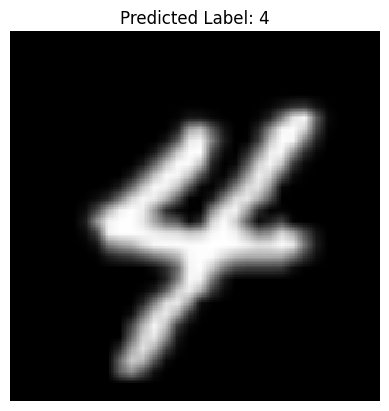

In [ ]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Sequential

# Define AlexNet Model
alex_model = Sequential([
    Conv2D(96, (3, 3), strides=1, activation='relu', input_shape=(32,32,3)),
    MaxPooling2D((2, 2), strides=2),

    Conv2D(256, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),

    Conv2D(384, (3, 3), padding='same', activation='relu'),
    Conv2D(384, (3, 3), padding='same', activation='relu'),
    Conv2D(256, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),

    Flatten(),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # 10 classes for MNIST digits
])

# Compile model
alex_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
alex_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=64)

# Evaluate model
test_loss, test_acc = alex_model.evaluate(X_test, y_test)
print(f"AlexNet Test Accuracy: {test_acc * 100:.2f}%")

# Select a test sample
test_img = X_train[131]

# Predict the class for the sample image
y_pred = model.predict(np.expand_dims(test_img, axis=0))  # Add batch dimension
predicted_class = np.argmax(y_pred)

print("Sample after training")

# Convert color image to grayscale
test_img_gray = tf.image.rgb_to_grayscale(test_img)

# Visualize the grayscale image AFTER training with predicted label
plt.imshow(tf.image.resize(test_img_gray, (227, 227)).numpy().squeeze(), cmap='gray', interpolation='none')
plt.title(f"Predicted Label: {predicted_class}")
plt.axis('off')
plt.show()

 **VGG16**

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 19ms/step - accuracy: 0.7916 - loss: 0.7245 - val_accuracy: 0.9427 - val_loss: 0.1896
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 16s 15ms/step - accuracy: 0.9470 - loss: 0.1771 - val_accuracy: 0.9601 - val_loss: 0.1271
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.9574 - loss: 0.1358 - val_accuracy: 0.9630 - val_loss: 0.1164
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - accuracy: 0.9654 - loss: 0.1137 - val_accuracy: 0.9644 - val_loss: 0.1101
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - accuracy: 0.9671 - loss: 0.1051 - val_accuracy: 0.9693 - val_loss: 0.0948
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9649 - loss: 0.1072
VGG16 Test Accuracy: 96.93%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Sample after training


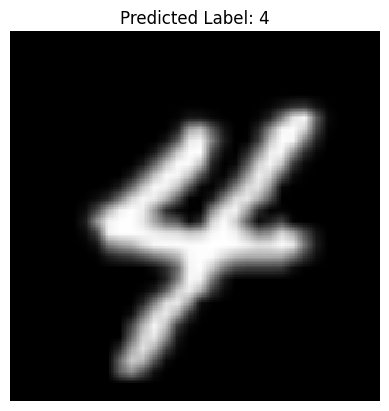

In [ ]:
from keras.applications.vgg16 import VGG16

# Define VGG16 model
vgg_base = VGG16(include_top=False, weights='imagenet', input_shape=(32,32,3))

# Freeze base layers
for layer in vgg_base.layers:
    layer.trainable = False

# Build full model
vgg_model = Sequential([
    vgg_base,
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # 10 classes for MNIST digits
])

# Compile model
vgg_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
vgg_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=64)

# Evaluate model
test_loss, test_acc = vgg_model.evaluate(X_test, y_test)
print(f"VGG16 Test Accuracy: {test_acc * 100:.2f}%")

# Select a test sample
test_img = X_train[131]

# Predict the class for the sample image
y_pred = model.predict(np.expand_dims(test_img, axis=0))  # Add batch dimension
predicted_class = np.argmax(y_pred)

print("Sample after training")

# Convert color image to grayscale
test_img_gray = tf.image.rgb_to_grayscale(test_img)

# Visualize the grayscale image AFTER training with predicted label
plt.imshow(tf.image.resize(test_img_gray, (227, 227)).numpy().squeeze(), cmap='gray', interpolation='none')
plt.title(f"Predicted Label: {predicted_class}")
plt.axis('off')
plt.show()